In [115]:
# Library import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from util.pairs_selection import *
from util.backtest import *
from util.bands import *
plt.rcParams["font.family"] = "NanumGothic"
import warnings
warnings.filterwarnings(action='ignore')
import matplotlib.ticker as ticker
import pickle

In [132]:
# Data load
pairs_list_30 = [
 ('CJ', 'CJ우'),
 ('CJ제일제당', 'CJ제일제당 우'),
 ('GS', 'GS우'),
 ('JW중외제약', 'JW중외제약우'),
 ('LG', 'LG우'),
 ('LG생활건강', 'LG생활건강우'),
 ('LG전자', 'LG전자우'),
 ('LG화학', 'LG화학우'),
 ('NH투자증권', 'NH투자증권우'),
 ('SK네트웍스', 'SK네트웍스우'),
 ('SK이노베이션', 'SK이노베이션우'),
 ('S-Oil', 'S-Oil우'),
 ('금호석유', '금호석유우'),
 ('넥센타이어', '넥센타이어1우B'),
 ('대상', '대상우'),
 ('대한항공', '대한항공우'),
 ('미래에셋증권', '미래에셋증권우'),
 ('삼성SDI', '삼성SDI우'),
 ('삼성전기', '삼성전기우'),
 ('삼성전자', '삼성전자우'),
 ('삼성화재', '삼성화재우'),
 ('아모레G', '아모레G우'),
 ('아모레퍼시픽', '아모레퍼시픽우'),
 ('유한양행', '유한양행우'),
 ('한국금융지주', '한국금융지주우'),
 ('한화', '한화우'),
 ('한화솔루션', '한화솔루션우'),
 ('현대건설', '현대건설우'),
 ('현대차', '현대차우'),
 ('호텔신라', '호텔신라우')]

pairs_list_15 = [('CJ제일제당', 'CJ제일제당 우'),
 ('LG', 'LG우'),
 ('LG생활건강', 'LG생활건강우'),
 ('LG전자', 'LG전자우'),
 ('LG화학', 'LG화학우'),
 ('NH투자증권', 'NH투자증권우'),
 ('SK이노베이션', 'SK이노베이션우'),
 ('S-Oil', 'S-Oil우'),
 ('미래에셋증권', '미래에셋증권우'),
 ('삼성SDI', '삼성SDI우'),
 ('삼성전자', '삼성전자우'),
 ('삼성화재', '삼성화재우'),
 ('아모레퍼시픽', '아모레퍼시픽우'),
 ('한국금융지주', '한국금융지주우'),
 ('현대차', '현대차우')]

In [243]:
pairs_list = pairs_list_15

In [244]:
len(pairs_list)

15

In [245]:
if __name__ == "__main__":
    main_path = '/home/lululalamoon/CHO/chosta/data/k_stocks/daily/ohlcv'
    ohlcv_list = []
    price_pairs = []
    stock_names = []
    for pair in pairs_list:
        for j in pair:
            data = pd.read_csv(main_path + f'/{j}_ohlcv.csv', index_col=0, parse_dates=True)
            ohlcv_list.append(data)
            stock_names.append(j)
    ohlcv_dict = dict(zip(stock_names, ohlcv_list))

In [246]:
ps = PairsSelection(pairs_list, ohlcv_dict)

In [247]:
all_transactions, all_inventories, all_equity_curve, all_pos = get_backtest(pairs_list, ohlcv_dict, transaction_cost=0.002, start_date='2009-1-1', end_date='2022-1-1')

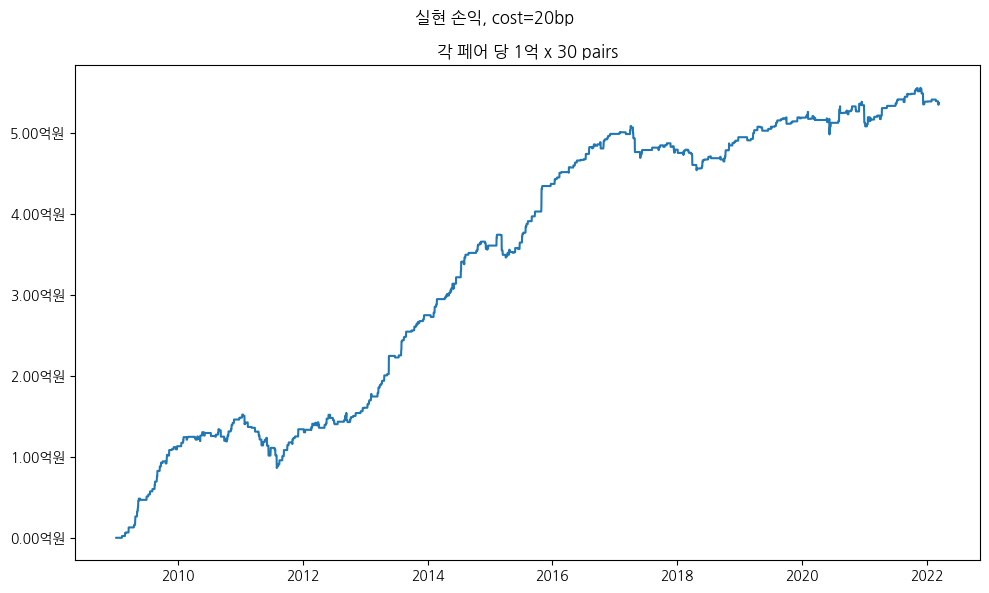

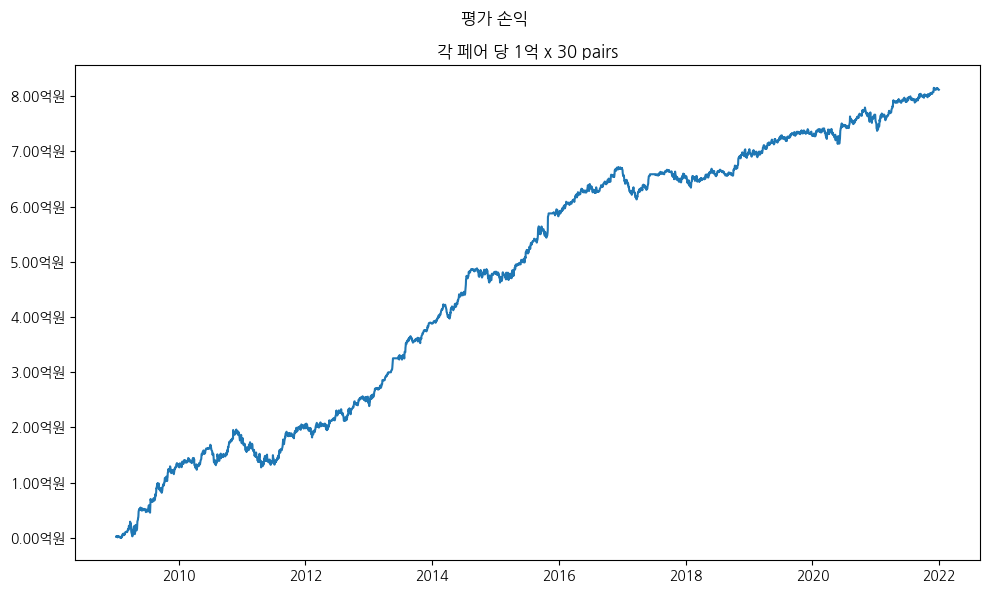

In [248]:
# 자산 전체 실현손익 누적
inv_sum = pd.concat(all_inventories, axis=1).fillna(method='ffill').fillna(method='bfill').sum(axis=1)

f, ax = plt.subplots(1, figsize=(10, 6))
f.suptitle('실현 손익, cost=20bp')
ax.set_title('각 페어 당 1억 x 30 pairs')
ax.yaxis.set_major_formatter(
    ticker.FuncFormatter(lambda inv_sum,
                                pos: '{:,.2f}'.format(inv_sum / 100_000_000) + '억원'))
ax.plot(inv_sum)
f.tight_layout()
plt.show()

# 전체 자산 평가손익 누적
eq_sum = pd.concat(all_equity_curve, axis=1).fillna(method='ffill').fillna(method='bfill').sum(axis=1)[:'2022-1-1']
f, ax = plt.subplots(1, figsize=(10, 6))
f.suptitle('평가 손익')
ax.set_title('각 페어 당 1억 x 30 pairs')
ax.yaxis.set_major_formatter(
    ticker.FuncFormatter(lambda eq_sum ,
                                pos: '{:,.2f}'.format(eq_sum  / 100_000_000) + '억원'))
ax.plot(eq_sum )
f.tight_layout()
plt.show()

In [249]:
(inv_sum[-1]/13)/3_000_000_000

0.013755958025641024

HURST SELECTION

In [250]:
top_pairs = ps.get_top_hurst_pairs(start_date='2008-4-1',lookback=200, step=248*2,
                       top_n=5)

In [251]:
reselection_dates = list(top_pairs.index) + [pd.Timestamp(2022,1,1)]

In [295]:
top_pairs.values

array([[list([('CJ제일제당', 'CJ제일제당 우'), ('LG화학', 'LG화학우'), ('현대차', '현대차우'), ('S-Oil', 'S-Oil우'), ('SK이노베이션', 'SK이노베이션우')])],
       [list([('한국금융지주', '한국금융지주우'), ('현대차', '현대차우'), ('SK이노베이션', 'SK이노베이션우'), ('LG전자', 'LG전자우'), ('LG', 'LG우')])],
       [list([('한국금융지주', '한국금융지주우'), ('아모레퍼시픽', '아모레퍼시픽우'), ('SK이노베이션', 'SK이노베이션우'), ('LG화학', 'LG화학우'), ('NH투자증권', 'NH투자증권우')])],
       [list([('한국금융지주', '한국금융지주우'), ('삼성전자', '삼성전자우'), ('아모레퍼시픽', '아모레퍼시픽우'), ('NH투자증권', 'NH투자증권우'), ('LG', 'LG우')])],
       [list([('삼성화재', '삼성화재우'), ('삼성전자', '삼성전자우'), ('LG', 'LG우'), ('SK이노베이션', 'SK이노베이션우'), ('CJ제일제당', 'CJ제일제당 우')])],
       [list([('삼성SDI', '삼성SDI우'), ('LG화학', 'LG화학우'), ('LG전자', 'LG전자우'), ('삼성전자', '삼성전자우'), ('한국금융지주', '한국금융지주우')])],
       [list([('현대차', '현대차우'), ('삼성화재', '삼성화재우'), ('미래에셋증권', '미래에셋증권우'), ('삼성전자', '삼성전자우'), ('LG', 'LG우')])]],
      dtype=object)

In [286]:
all_transactions_l=[]; all_inventories_l=[]
all_equity_curve_l=[]; all_pos_l=[]
for n in range(len(top_pairs)):
    all_transactions, all_inventories, all_equity_curve, all_pos = get_backtest(top_pairs.iloc[n].pairs, ohlcv_dict, bb_window=20, bb_sl_mult=4,
                                                                                initial_invest=6_00000000, transaction_cost=0.002,
                                                                                start_date=reselection_dates[n], end_date=reselection_dates[n+1])
    all_transactions_l.append(all_transactions)
    all_inventories_l.append(all_inventories)
    all_equity_curve_l.append(all_equity_curve)
    all_pos_l.append(all_pos)

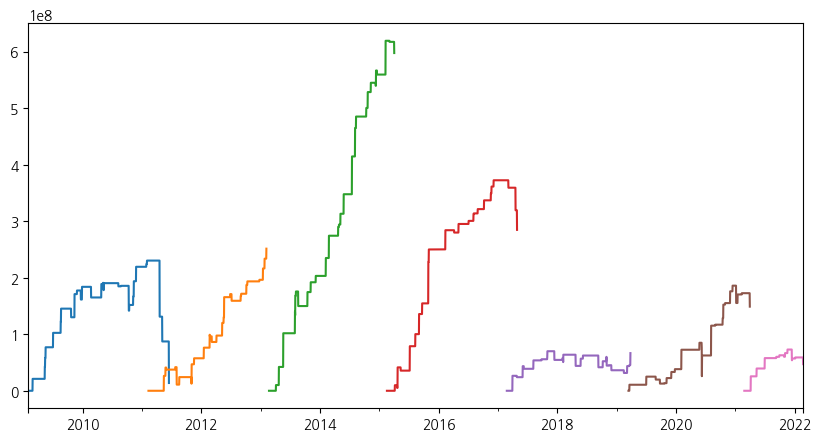

In [287]:
all_inv_sum = []
plt.figure(figsize=(10,5))
for i in range(len(top_pairs)):
    inv_ = pd.concat(all_inventories_l[i],axis=1).fillna(method='ffill').fillna(method='bfill').sum(axis=1)
    inv_.plot()
    all_inv_sum.append(inv_)

In [288]:
inv_sum = pd.concat(all_inv_sum,axis=1).diff().sum(axis=1).cumsum()

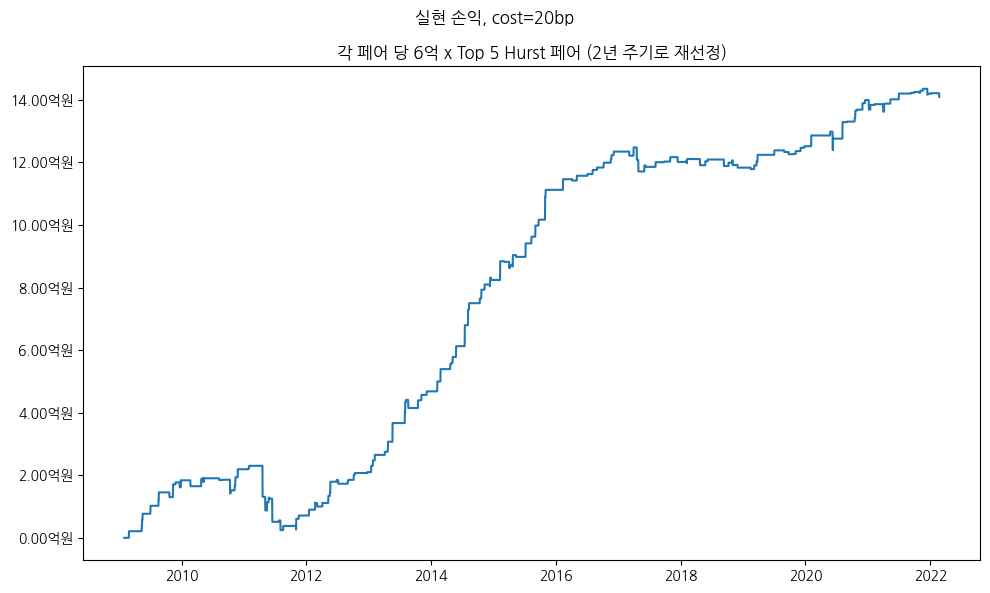

In [289]:
f, ax = plt.subplots(1, figsize=(10, 6))
f.suptitle('실현 손익, cost=20bp')
ax.set_title('각 페어 당 6억 x Top 5 Hurst 페어 (2년 주기로 재선정)')
ax.yaxis.set_major_formatter(
    ticker.FuncFormatter(lambda inv_sum,
                                pos: '{:,.2f}'.format(inv_sum / 100_000_000) + '억원'))
ax.plot(inv_sum)
f.tight_layout()
#plt.savefig('img/pnl_sum_30p.png')
plt.show()

In [294]:
(inv_sum[-1]/13)/3_000_000_000

0.03614428612364101

In [291]:
all_eq_sum = []
for i in range(len(top_pairs)):
    eq_ = pd.concat(all_equity_curve_l[i],axis=1).fillna(method='ffill').fillna(method='bfill').sum(axis=1)
    all_eq_sum.append(eq_)

In [292]:
eq_sum = pd.concat(all_eq_sum,axis=1).diff().sum(axis=1).cumsum()[:'2022-2-8']

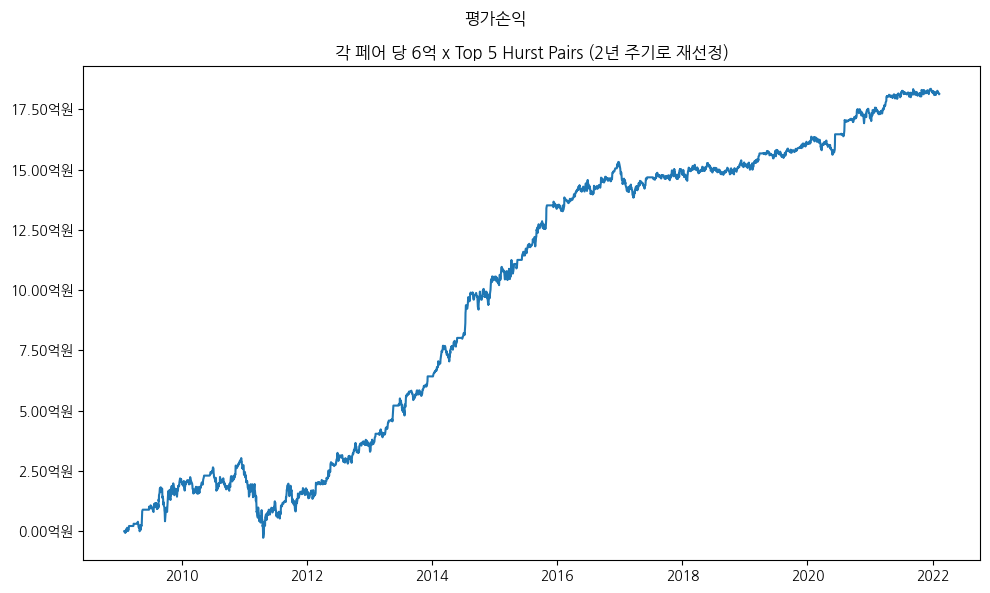

In [293]:
# 전체 자산 평가손익 누적
f, ax = plt.subplots(1, figsize=(10, 6))
f.suptitle('평가손익')
ax.set_title('각 페어 당 6억 x Top 5 Hurst Pairs (2년 주기로 재선정)')
ax.yaxis.set_major_formatter(
    ticker.FuncFormatter(lambda eq_sum ,
                                pos: '{:,.2f}'.format(eq_sum  / 100_000_000) + '억원'))
ax.plot(eq_sum )
f.tight_layout()
plt.show()